<center><span style="font-family:Comic Sans MS; color:navy "><h1>Cirrhosis Outcomes Predictions(EDA,LGBMClassifiers ,84% Accuracy)</h1></span></center>

# <b>a <span style='color:#94D4F6'>|</span> Table of Conents</b>
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3)
- [4. Preprocessing](#4)
- [6. Split Dataset](#6)
- [7. Modeling](#7)
- [9. Evaluation](#8) 
- [8. Predict test data](#9)

# <b>b <span style='color:#94D4F6'>|</span> About DataSet</b>

<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. This competition is required a machine learning method to predict survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).
# Medical defenition of the features 

Let us take a look at what each feature indicates:

**N_Days:** Number of days betwqeen registration and the earlier of death, transplantation, or study analysis time in July 1986

**Drug:** Type of drug administered to the patient, with options such as D-penicillamine or Placebo.

**Age:** Age of the patient, indicating the chronological age at the time of data collection.

**Sex:** Gender of the patient, with "F" representing females.

**Ascites:** Presence or absence of ascites, a medical condition characterized by fluid accumulation in the abdomen.

**Hepatomegaly:** Presence or absence of hepatomegaly, an enlargement of the liver.

**Spiders:** Presence or absence of spider angiomas, visible blood vessels in a spider-like pattern on the skin.

**Edema:** Presence or absence of edema, which is swelling caused by the accumulation of excess fluid in body tissues.

**Bilirubin:** Bilirubin levels in the blood, an indicator of liver function.

**Cholesterol:**  Cholesterol levels in the blood, a measure of lipid metabolism.

**Albumin:** Albumin levels in the blood, an important protein produced by the liver.

**Copper:** Copper levels, which can be relevant to liver function

**Alk_Phos:** Alkaline phosphatase levels in the blood, an enzyme associated with liver and bone function.

**SGOT:** Serum Glutamic Oxaloacetic Transaminase levels, an enzyme indicating liver health.

**Tryglicerides:** Triglycerides levels in the blood, representing another aspect of lipid metabolism.

**Platelets**:  Platelet count in the blood, important for blood clotting.

**Prothrombin**: Prothrombin levels, a key component in the blood clotting process.

**Stage**: Stage of the patient's condition, providing information on the severity or progression of cirrhosis.

<a id="1"></a>
# <b>1 <span style='color:#94D4F6'>|</span> Import Libraries</b>

In [122]:
import numpy as np
import pandas as pd

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# for Preprocessing
from sklearn.preprocessing import(
    MinMaxScaler,
    OneHotEncoder,
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler
)
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)

# Modeling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import optuna # find best parameter
from sklearn.model_selection import KFold, StratifiedKFold

# For Evaluation 
from sklearn.metrics import(
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    log_loss,
    confusion_matrix
)

# For feature Engineering 
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline

<a id="2"></a>
# <b>2 <span style='color:#94D4F6'>|</span> Read Dataset</b>

In [46]:
df = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
sample_submissiion = pd.read_csv('Data/sample_submission.csv')
original_data = pd.read_csv('Data/cirrhosis.csv')
testCopy = test.copy()

In [47]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [48]:
original_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
As you can see, our dataset does not contain any null values. However, there are some categorical variables present. We need to perform preprocessing operations on these variables to transform them into suitable inputs for our modeling step.

### Shape

In [50]:
print('shape of the training dataset:')
print('There are {} rows and {} columns in the train dataset.'.format(df.shape[0], df.shape[1]))
print('shape of the original dataset:')
print('There are {} rows and {} columns in the original dataset.'.format(original_data.shape[0], original_data.shape[1]))
print('shape of the test dataset:')
print('There are {} rows and {} columns in the test dataset.'.format(test.shape[0], test.shape[1]))

shape of the training dataset:
There are 7905 rows and 20 columns in the train dataset.
shape of the original dataset:
There are 418 rows and 20 columns in the original dataset.
shape of the test dataset:
There are 5271 rows and 19 columns in the test dataset.


### Describe the dataset

In [51]:
df.describe().style.background_gradient(cmap ='summer')

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
And here is some statistical information about our dataset. I will create clear plots to present the data more effectively.

### Columns

In [52]:
df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

### Drop unnecessary columns

In [53]:
df = df.drop(['id'], axis=1)
original_data = original_data.drop(['ID'], axis=1)

# Combine the competition train data and original data
df = pd.concat([df, original_data])

### Determine the Categorical and Numerical Features

In [54]:
target = 'Status'
obj_col = [x for x in df.select_dtypes(include=['object']).columns if x!=target]
num_col = [x for x in df.select_dtypes(exclude =['object']).columns if x!= target]
print(f'obj_columns: {obj_col}')
print(f'num_columns: {num_col}')

obj_columns: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
num_columns: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


<a id="3"></a>
# <b>3 <span style='color:#94D4F6'>|</span> Explanatory Data Analysis (EDA)</b>
<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">

<font size="3">Let's see what's the quality of raw dataset.</font>

In [55]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum
summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
N_Days,int64,0,0.000000,495,8323
Drug,object,106,0.012736,2,8217
Age,int64,0,0.000000,397,8323
Sex,object,0,0.000000,2,8323
Ascites,object,106,0.012736,2,8217
Hepatomegaly,object,106,0.012736,2,8217
Spiders,object,106,0.012736,2,8217
Edema,object,0,0.000000,3,8323
Bilirubin,float64,0,0.000000,117,8323
Cholesterol,float64,134,0.016100,227,8189


In [56]:
print('----------test data ------------')
summary(test).style.background_gradient(cmap='Blues')

----------test data ------------


,dtypes,missing#,missing%,uniques,count
id,int64,0,0.000000,5271,5271
N_Days,int64,0,0.000000,409,5271
Drug,object,0,0.000000,2,5271
Age,int64,0,0.000000,363,5271
Sex,object,0,0.000000,2,5271
Ascites,object,0,0.000000,2,5271
Hepatomegaly,object,0,0.000000,2,5271
Spiders,object,0,0.000000,2,5271
Edema,object,0,0.000000,3,5271
Bilirubin,float64,0,0.000000,108,5271


### Checking Correlation 

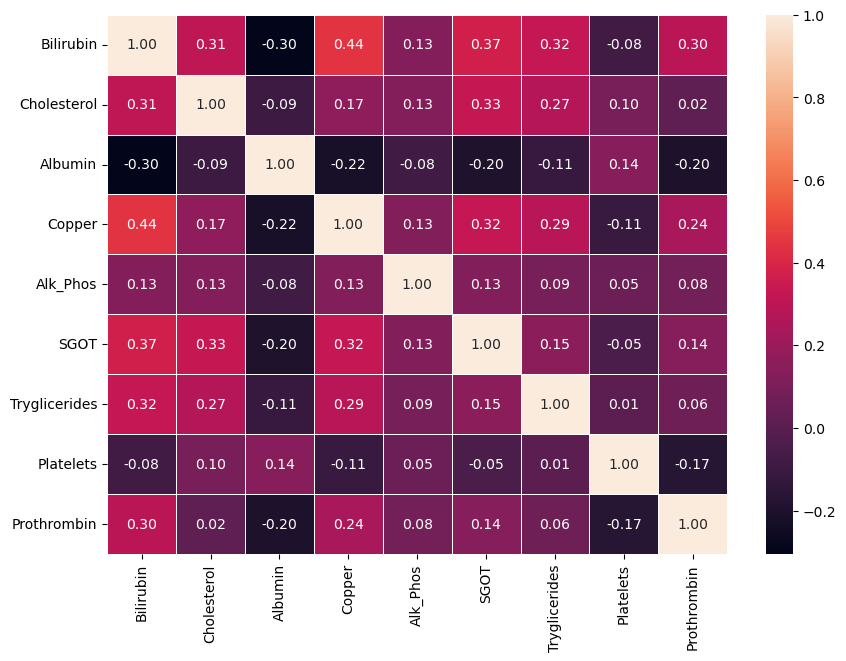

In [57]:
selected_features = [
    
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Prothrombin'
]

# Create a subset correlation matrix for the selected features
subset_correlation_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    subset_correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=.5
)

plt.show()

 - no action taken.

### Label Distribution

Count of each Status:
C     5197
D     2826
CL     300
Name: Status, dtype: int64
---------------------------------------------------


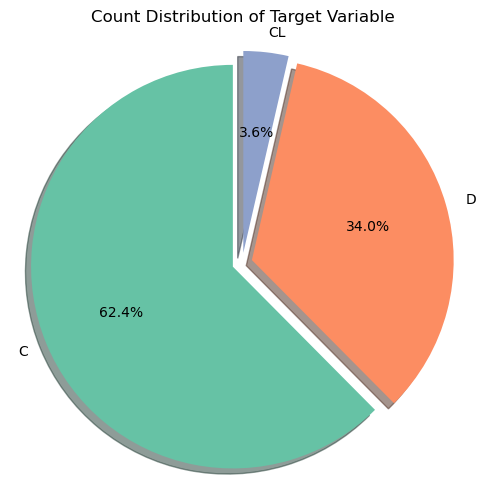

In [58]:
counts = df['Status'].value_counts()
df_counts = pd.DataFrame({'Class': counts.index, 'Count': counts.values})
# Sort the DataFrame by count in descending order
df_counts = df_counts.sort_values('Count', ascending=False)
# 
print("Count of each Status:")
print(counts)
print("---------------------------------------------------")


sns.set_palette("Set2")
plt.figure(figsize=(6, 6))
plt.pie(df_counts['Count'], labels=df_counts['Class'], autopct='%1.1f%%',explode=(0.05,0.05,0.05), shadow=True, startangle=90, colors=sns.color_palette())
plt.title('Count Distribution of Target Variable')
plt.axis('equal')
plt.show()

In [59]:
feat_distribution = ['N_Days',
                     'Age',
                     'Bilirubin',
                     'Cholesterol',
                     'Albumin',
                     'Copper',
                     'Alk_Phos',
                     'SGOT',
                     'Tryglicerides',
                     'Platelets',
                     'Prothrombin',
                     'Stage']

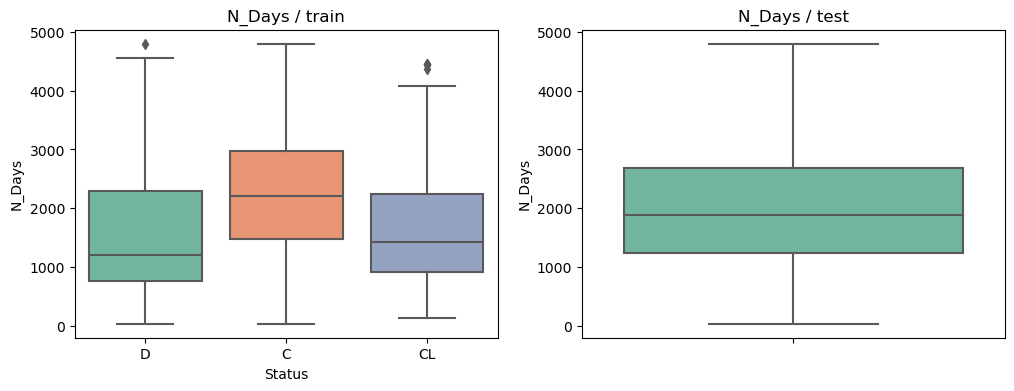

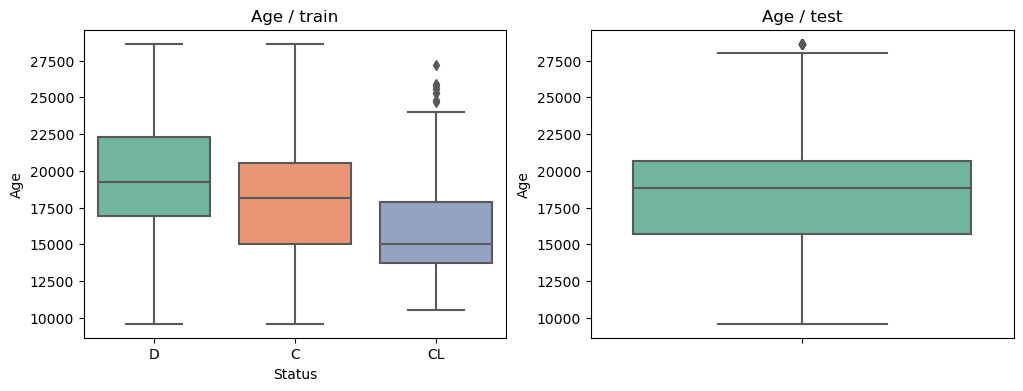

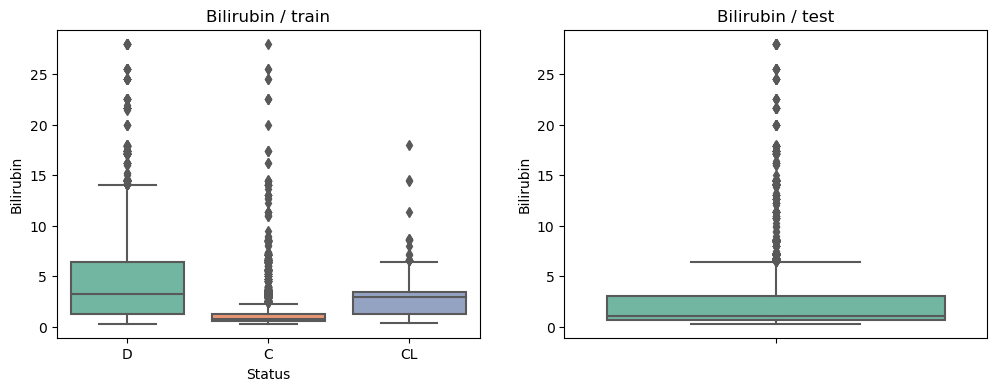

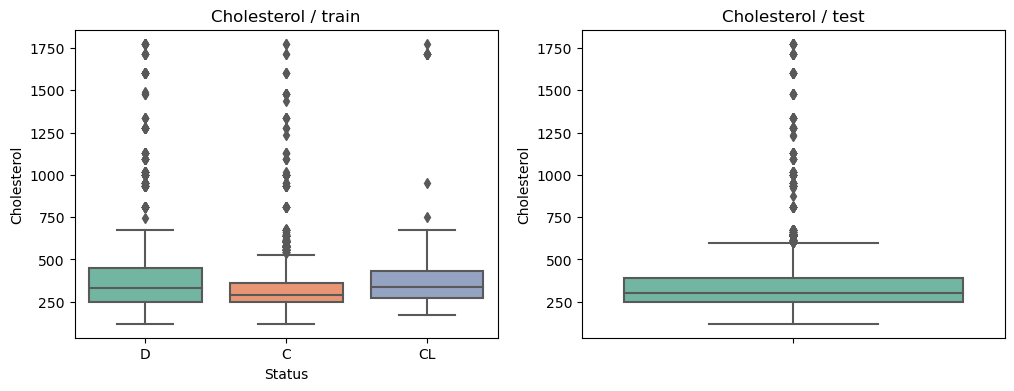

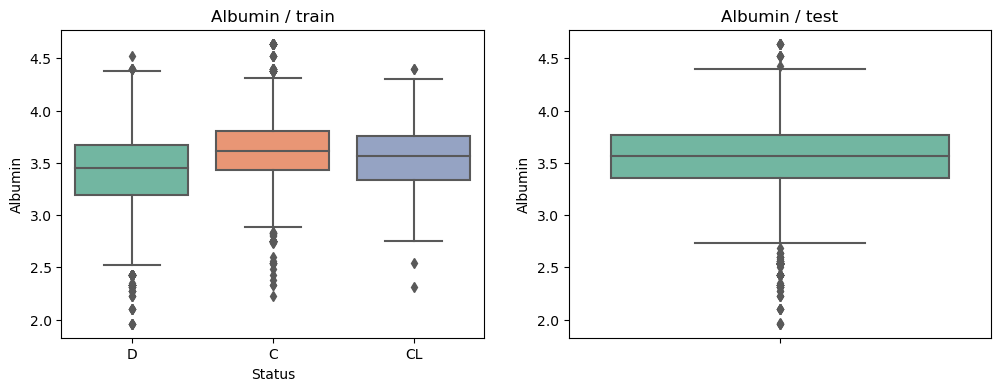

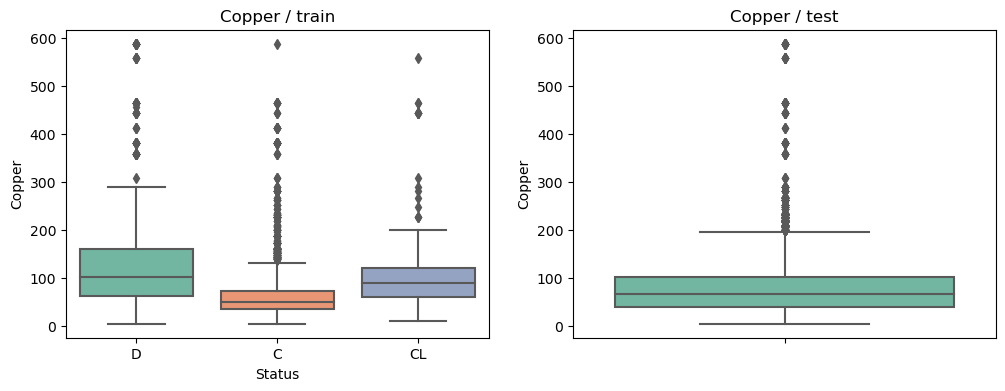

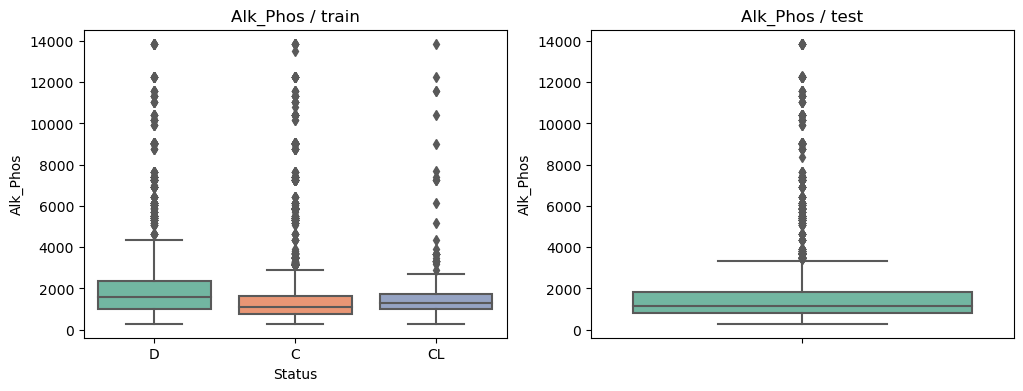

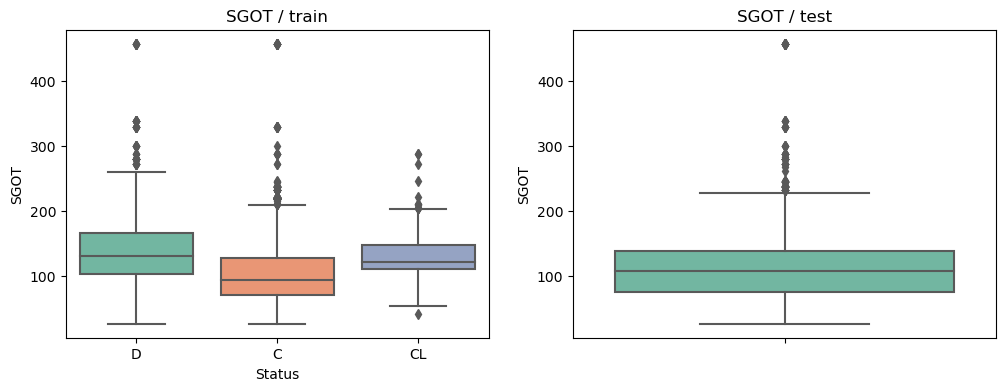

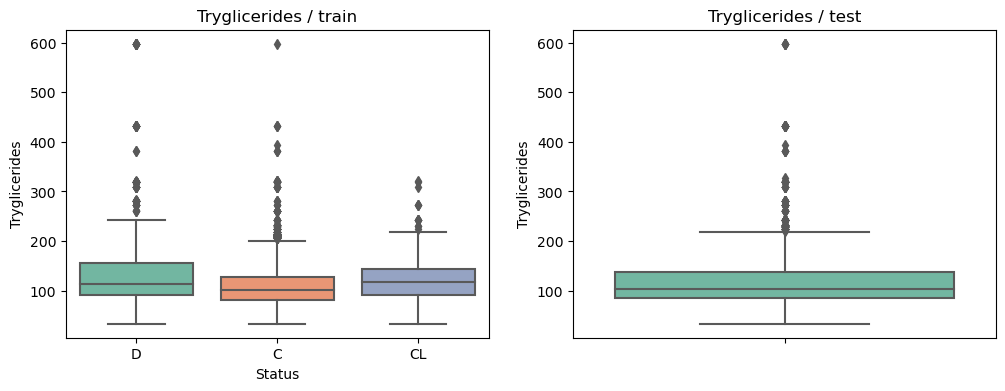

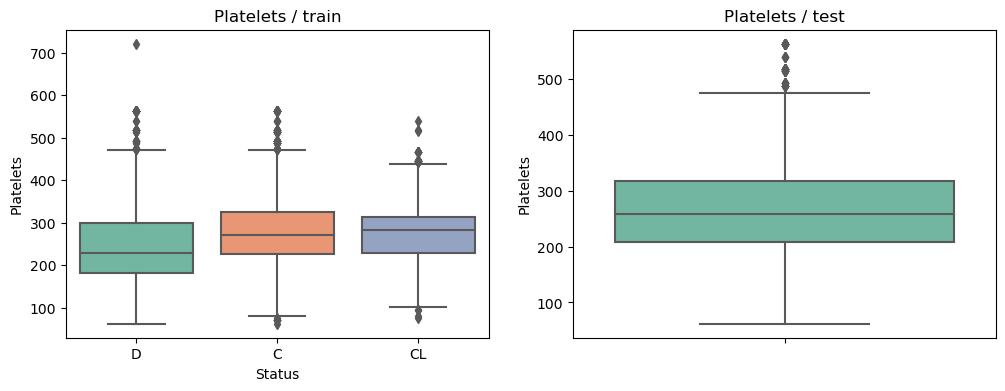

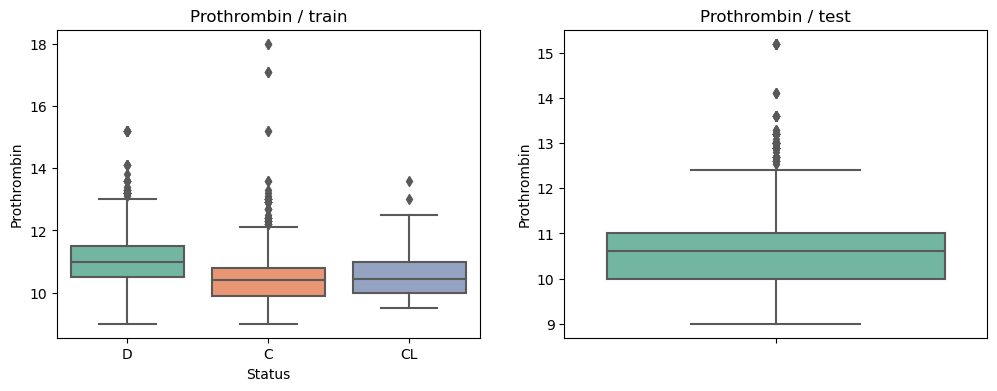

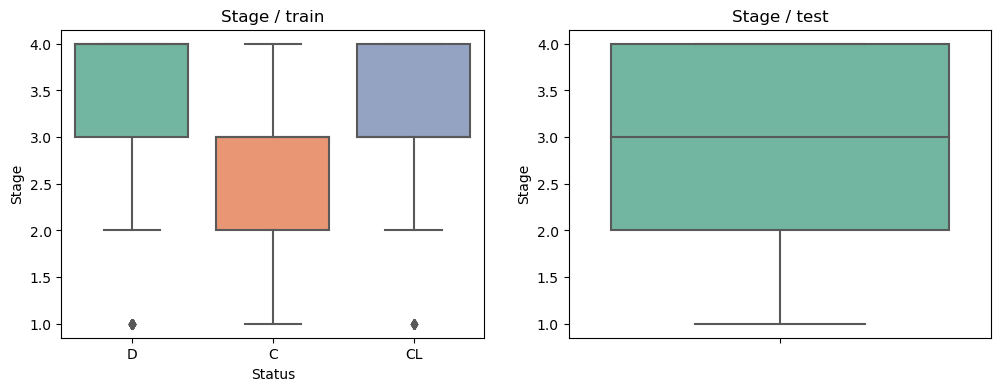

In [60]:
for feat in feat_distribution:
    plt.figure(figsize=(12,4))
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(data=df, x='Status', y=feat)#x='Status', 
    plt.title(feat + ' / train')
    x1 = plt.subplot(1,2,2)
    sns.boxplot(data=test, y=feat)
    plt.title(feat + ' / test')
    plt.show()

<a id="4"></a>
# <b>4 <span style='color:#94D4F6'>|</span> Preprocessing</b>

### Encode Categorical Variables to Numerical

In [62]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [63]:
original_data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Data Cleaning

In [68]:
# Check for null values
df.isnull().sum()

N_Days             0
Drug             212
Age                0
Sex                0
Ascites          212
Hepatomegaly     212
Spiders          212
Edema              0
Bilirubin          0
Cholesterol      268
Albumin            0
Copper           216
Alk_Phos         212
SGOT             212
Tryglicerides    272
Platelets         22
Prothrombin        4
Stage             12
Status             0
dtype: int64

In [69]:
# Features with missing values

miss_feat=['Drug',            # object
           'Ascites',         # object
           'Hepatomegaly',    # object
           'Spiders',         # object
           'Cholesterol',     # float64
           'Copper',          # float64
           'Alk_Phos',        # float64
           'SGOT',            # float64
           'Tryglicerides',   # float64
           'Platelets',       # float64
           'Prothrombin',     # float64
           'Stage']           # float64

len(miss_feat)

12

In [71]:
for feat in miss_feat:
    df[feat].fillna(df[feat].mode()[0], inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8741 non-null   int64  
 1   Drug           8741 non-null   object 
 2   Age            8741 non-null   int64  
 3   Sex            8741 non-null   object 
 4   Ascites        8741 non-null   object 
 5   Hepatomegaly   8741 non-null   object 
 6   Spiders        8741 non-null   object 
 7   Edema          8741 non-null   object 
 8   Bilirubin      8741 non-null   float64
 9   Cholesterol    8741 non-null   float64
 10  Albumin        8741 non-null   float64
 11  Copper         8741 non-null   float64
 12  Alk_Phos       8741 non-null   float64
 13  SGOT           8741 non-null   float64
 14  Tryglicerides  8741 non-null   float64
 15  Platelets      8741 non-null   float64
 16  Prothrombin    8741 non-null   float64
 17  Stage          8741 non-null   float64
 18  Status  

### Feature Encoding

In [75]:
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target]) #Encoding target.

encoders = {
    'Drug': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories=[['Placebo', 'D-penicillamine']]),
    'Sex': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Ascites': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Hepatomegaly': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Spiders': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    'Edema': OneHotEncoder(),
    'Stage': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
}

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8741 entries, 0 to 8740
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8741 non-null   int64  
 1   Drug           8741 non-null   object 
 2   Age            8741 non-null   int64  
 3   Sex            8741 non-null   object 
 4   Ascites        8741 non-null   object 
 5   Hepatomegaly   8741 non-null   object 
 6   Spiders        8741 non-null   object 
 7   Edema          8741 non-null   object 
 8   Bilirubin      8741 non-null   float64
 9   Cholesterol    8741 non-null   float64
 10  Albumin        8741 non-null   float64
 11  Copper         8741 non-null   float64
 12  Alk_Phos       8741 non-null   float64
 13  SGOT           8741 non-null   float64
 14  Tryglicerides  8741 non-null   float64
 15  Platelets      8741 non-null   float64
 16  Prothrombin    8741 non-null   float64
 17  Stage          8741 non-null   float64
 18  Status  

### Applying encoding

In [77]:
for feat, enc in encoders.items():
    if isinstance(enc, OrdinalEncoder):
        df[feat] = enc.fit_transform(df[[feat]]).astype('int32')
        test[feat] = enc.transform(test[[feat]]).astype('int32')
    if isinstance(enc, OneHotEncoder):
        new_cols = enc.fit_transform(df[[feat]]).toarray().astype('int8')
        col_names = enc.get_feature_names_out()
        
        df[col_names] = new_cols
        df.drop(feat, axis=1, inplace=True)
        
        new_cols_test = enc.transform(test[[feat]]).toarray().astype('int8')
        test[col_names] = new_cols_test
        test.drop(feat, axis=1, inplace=True)

## Additional Features
This section is copied from [this notebook](https://www.kaggle.com/code/markuslill/s3e26-xgbclassifer) by [MLMOSAIC](https://www.kaggle.com/markuslill) 

We will create some additional features. An explanation is provided below:

| Transformer Class     | Type | Description |
|-----------------------|------|-------------|
| `DiagnosisDateTransformer`   | `num` | Calculates 'Diagnosis_Date' by subtracting 'N_Days' from 'Age'. This could provide a more direct measure of time since diagnosis, relevant for analysis.          |
| `AgeBinsTransformer`         | `cat` | Categorizes 'Age' into bins (19, 29, 49, 64, 99), converting a continuous variable into a categorical one for simplified analysis.                 |
| `BilirubinAlbuminTransformer`| `num` | Creates a new feature 'Bilirubin_Albumin' by multiplying 'Bilirubin' and 'Albumin', potentially highlighting interactions between these two variables.             |
| `NormalizeLabValuesTransformer`| `num` | Normalizes laboratory values (like 'Bilirubin', 'Cholesterol', etc.) to their z-scores, standardizing these features for modeling purposes.                       |
| `DrugEffectivenessTransformer`| `num` | Generates a new feature 'Drug_Effectiveness' by combining 'Drug' and 'Bilirubin' levels. This assumes that changes in 'Bilirubin' reflect drug effectiveness.   |
| `SymptomScore(Cat)Transformer`    | `num` | Summarizes the presence of symptoms ('Ascites', 'Hepatomegaly', etc.) into a single 'Symptom_Score', simplifying the representation of patient symptoms.      |
| `LiverFunctionTransformer`   | `num` | Computes 'Liver_Function_Index' as the average of key liver function tests, providing a comprehensive metric for liver health.                                    |
| `RiskScoreTransformer`       | `num` | Calculates 'Risk_Score' using a combination of 'Bilirubin', 'Albumin', and 'Alk_Phos', potentially offering a composite risk assessment for patients.              |
| `TimeFeaturesTransformer`    | `num` | Extracts 'Year' and 'Month' from 'N_Days', converting a continuous time measure into more interpretable categorical time units.                                    |


In [78]:
class DiagnosisDateTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Diagnosis_Date'] = X['Age'] - X['N_Days']
        return X
    
class AgeYearsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Age_Years'] = round(X['Age'] / 365.25).astype("int16")
        return X

class AgeGroupsTransformer(BaseEstimator, TransformerMixin):
    """Older people might be hit harder (interaction) by health issues. Also can cover lifestyle influences, i.e.
    alcohol consumption etc."""
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Use years from above, min=26, max=78
        X['Age_Group'] = pd.cut(X['Age_Years'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')
        return X

class BilirubinAlbuminTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Bilirubin_Albumin'] = X['Bilirubin'] * X['Albumin']
        return X

class DrugEffectivenessTransformer(BaseEstimator, TransformerMixin):
    # Placeholder concept, assuming 'Bilirubin' improvement is a measure of effectiveness
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Drug_Effectiveness'] = X['Drug'] * X['Bilirubin']
        return X

class SymptomScoreTransformer(BaseEstimator, TransformerMixin):
    # From data set explanations above let's add all the "bad" symptoms
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
        symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema_N', 'Edema_S', 'Edema_Y']
        X['Symptom_Score'] = X[symptom_columns].sum(axis=1)
        return X
    
class SymptomCatTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema_N', 'Edema_S', 'Edema_Y']
        self.encoder = OneHotEncoder(handle_unknown='ignore')

    def fit(self, X, y=None):
        X_copy = X.copy()
        symptom_scores = X_copy[self.symptom_columns].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
        self.encoder.fit(symptom_scores.values.reshape(-1, 1))
        return self

    def transform(self, X):
        X_transformed = X.copy()
        symptom_scores = X_transformed[self.symptom_columns].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
        
        encoded_features = self.encoder.transform(symptom_scores.values.reshape(-1, 1)).toarray().astype("int8")
        encoded_feature_names = self.encoder.get_feature_names_out(input_features=['Symptom_Score'])

        # Drop the original symptom columns and add the new encoded features
        # X_transformed.drop(columns=self.symptom_columns, inplace=True)
        X_transformed[encoded_feature_names] = pd.DataFrame(encoded_features, index=X_transformed.index)
        
        return X_transformed


class LiverFunctionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        liver_columns = ['Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT']
        X['Liver_Function_Index'] = X[liver_columns].mean(axis=1)
        return X

class RiskScoreTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Risk_Score'] = X['Bilirubin'] + X['Albumin'] - X['Alk_Phos']
        return X

class TimeFeaturesTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X['Diag_Year'] = (X['N_Days'] / 365).astype(int)
        X['Diag_Month'] = ((X['N_Days'] % 365) / 30).astype(int)
        return X
    
class ScalingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.num_feats = NUM_FEATS + ['Diagnosis_Date', 'Age_Years', 'Bilirubin_Albumin', 'Drug_Effectiveness', 
                                      'Symptom_Score', 'Liver_Function_Index', 'Risk_Score', 'Diag_Year', 'Diag_Month']

    def fit(self, X, y=None):
        self.scaler.fit(X[self.num_feats])
        return self

    def transform(self, X):
        X_scaled = X.copy()
        X_scaled[self.num_feats] = self.scaler.transform(X_scaled[self.num_feats])
        return X_scaled

# Define the pipeline
pipeline = Pipeline([
    ('diagnosis_date', DiagnosisDateTransformer()),
    ('age_years', AgeYearsTransformer()),
    #('age_groups', AgeGroupsTransformer()),
    ('bilirubin_albumin', BilirubinAlbuminTransformer()),
    ('drug_effectiveness', DrugEffectivenessTransformer()),
    ('symptom_score', SymptomScoreTransformer()),
    ('symptom_cat_score', SymptomCatTransformer()),
    ('liver_function', LiverFunctionTransformer()),
    ('risk_score', RiskScoreTransformer()),
    ('time_features', TimeFeaturesTransformer()),
    #('scaling', ScalingTransformer()),
    # ... ?
])

# Apply the pipeline to your dataframes
train_modified = pipeline.fit_transform(df)
test_modified = pipeline.transform(df)

# Update the CAT_FEATS
CAT_FEATS = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', #old
             'Age_Group', 'Symptom_Score'] # new 
# Update the NUM_FEATS ????

In [79]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Stage,Status,Edema_N,Edema_S,Edema_Y,Diagnosis_Date,Age_Years,Bilirubin_Albumin,Drug_Effectiveness,Symptom_Score
0,999,1,21532,1,0,0,0,2.3,316.0,3.35,...,2,2,1,0,0,20533,59,7.705,2.3,1
1,2574,0,19237,0,0,0,0,0.9,364.0,3.54,...,2,0,1,0,0,16663,53,3.186,0.0,1
2,3428,0,13727,0,0,1,1,3.3,299.0,3.55,...,3,2,0,0,1,10299,38,11.715,0.0,3
3,2576,0,18460,0,0,0,0,0.6,256.0,3.50,...,2,0,1,0,0,15884,51,2.100,0.0,1
4,788,0,16658,0,0,1,0,1.1,346.0,3.65,...,3,0,1,0,0,15870,46,4.015,0.0,2


### Detect Outliers

In [80]:
# Assuming you have a DataFrame named 'train_data'
categorical_columns_to_exclude = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status', 'Stage']
# plot_distributions(, categorical_columns_to_exclude)

tmp_df = df.copy()

# Calculate the mean and standard deviation for each column
means = tmp_df[num_col].mean()
std_devs = tmp_df[num_col].std()

# Define a threshold for what you consider to be an outlier, typically 3 standard deviations from the mean
n_stds = 6
thresholds = n_stds * std_devs

# Detect outliers
outliers = (np.abs(tmp_df[num_col] - means) > thresholds).any(axis=1)
print(f"Detected {sum(outliers)} that are more than {n_stds} SDs away from mean...")

# Remove Outlier
outliers_df = tmp_df[outliers]
print(f"Train data shape BEFORE outlier removal: {df.shape}")
df = tmp_df[~outliers].reset_index(drop=True)
print()
print(f"Train data shape AFTER outlier removal: {df.shape}")

Detected 159 that are more than 6 SDs away from mean...
Train data shape BEFORE outlier removal: (8741, 26)

Train data shape AFTER outlier removal: (8582, 26)


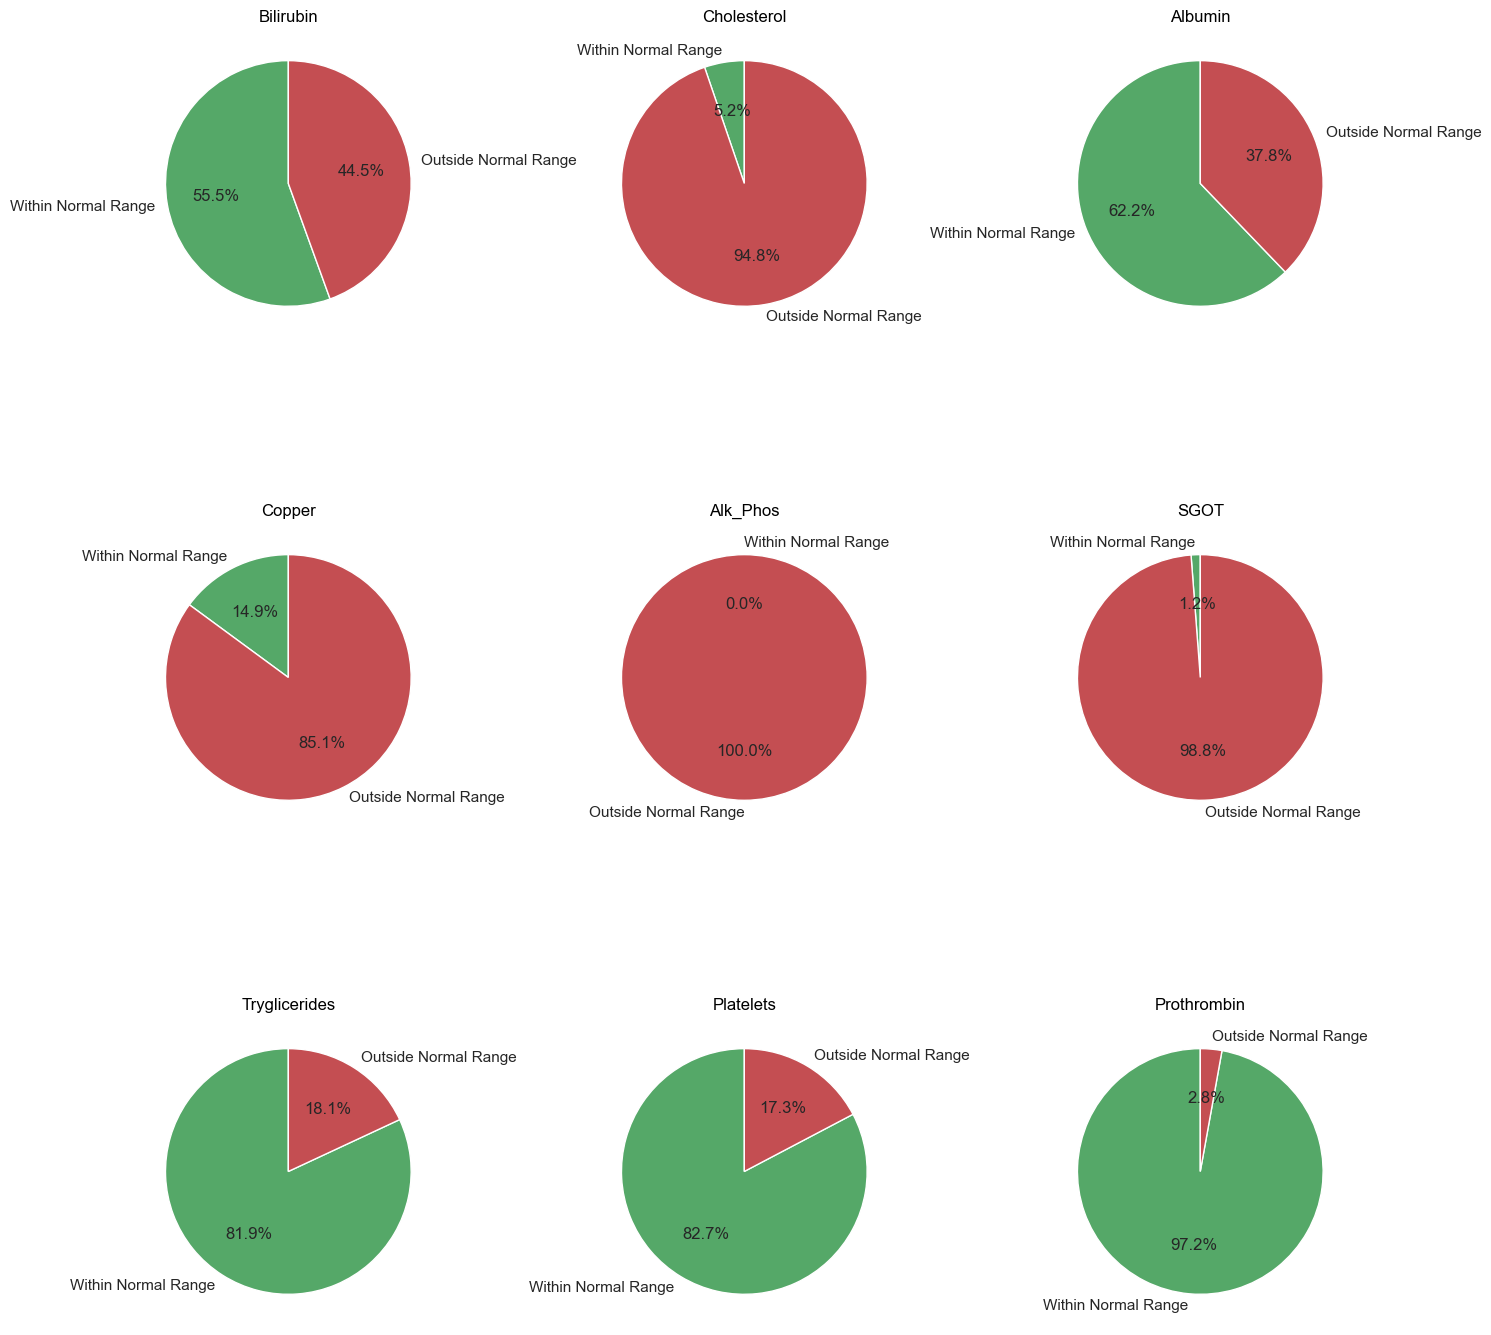

In [81]:
normal_ranges = {
    'Bilirubin': (0.1, 1.2),
    'Cholesterol': (0, 200),
    'Albumin': (3.5, 5.5),
    'Copper': (10, 30),
    'Alk_Phos': (40, 129),
    'SGOT': (8, 45),
    'Tryglicerides': (0, 150),
    'Platelets': (150, 400),
    'Prothrombin': (9.4, 12.5)
}
df_adding_features = df.copy()

for feature, (normal_range_min, normal_range_max) in normal_ranges.items():
    df_adding_features[f'{feature}_is_normal'] = (df_adding_features[feature] >= normal_range_min) & (df_adding_features[feature] <= normal_range_max)
    df_adding_features.loc[~df_adding_features[f'{feature}_is_normal'], f'{feature}_deviation'] = abs(df_adding_features[feature] - ((normal_range_min + normal_range_max) / 2))

df_adding_features.fillna(0, inplace=True)

df_for_pie=df_adding_features.copy()
numerical_features = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
df_for_pie = df_for_pie[numerical_features + [col for col in df_for_pie.columns if 'deviation' in col]]

def create_pie_chart(ax, feature):
    within_normal_range = df_for_pie[f'{feature}_deviation'].eq(0).sum()
    outside_normal_range = len(df_for_pie) - within_normal_range

    sns.set(style="whitegrid")
    ax.pie([within_normal_range, outside_normal_range], labels=['Within Normal Range', 'Outside Normal Range'], autopct='%1.1f%%', startangle=90, colors=['#55a868', '#c44e52'])
    ax.set_title(f'{feature}')

num_plots = len(numerical_features)
num_per_line = 3
num_lines = -(-num_plots // num_per_line) 

fig, axes = plt.subplots(num_lines, num_per_line, figsize=(15, 5 * num_lines))  

axes = axes.flatten() if num_lines == 1 else axes

for i, feature in enumerate(numerical_features):
    create_pie_chart(axes[i // num_per_line, i % num_per_line], feature)

for j in range(num_plots, num_lines * num_per_line):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Defining normal ranges:

In [82]:
normal_ranges = { #As mentioned in the earlier section.
    'Bilirubin': (0.1, 1.2),
    'Cholesterol': (0, 200),
    'Albumin': (3.4, 5.4),
    'Copper': (10, 30),
    'Alk_Phos': (40, 129),
    'SGOT': (8, 45),
    'Tryglicerides': (48.68, 168.15),
    'Platelets': (150, 400),
    'Prothrombin': (9.4, 12.5)
}

In [83]:
for feature, (normal_range_min, normal_range_max) in normal_ranges.items():
    if feature == 'Platelets':
        df[f'{feature}_is_normal'] = (df[feature] >= normal_range_min) & (df[feature] <= normal_range_max)
    elif feature == 'Albumin':
        df[f'{feature}_is_normal'] = (df[feature] >= normal_range_min)
    else:
        df[f'{feature}_is_normal'] = (df[feature] <= normal_range_max)

    # Add deviation calculation as before
    df.loc[~df[f'{feature}_is_normal'], f'{feature}_deviation'] = df[feature] - ((normal_range_min + normal_range_max) / 2)

df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   N_Days                   8582 non-null   int64  
 1   Drug                     8582 non-null   int32  
 2   Age                      8582 non-null   int64  
 3   Sex                      8582 non-null   int32  
 4   Ascites                  8582 non-null   int32  
 5   Hepatomegaly             8582 non-null   int32  
 6   Spiders                  8582 non-null   int32  
 7   Bilirubin                8582 non-null   float64
 8   Cholesterol              8582 non-null   float64
 9   Albumin                  8582 non-null   float64
 10  Copper                   8582 non-null   float64
 11  Alk_Phos                 8582 non-null   float64
 12  SGOT                     8582 non-null   float64
 13  Tryglicerides            8582 non-null   float64
 14  Platelets               

## Do it for test as well

In [84]:
for feature, (normal_range_min, normal_range_max) in normal_ranges.items():
    if feature == 'Platelets':
        test[f'{feature}_is_normal'] = (test[feature] >= normal_range_min) & (test[feature] <= normal_range_max)
    elif feature == 'Albumin':
        test[f'{feature}_is_normal'] = (test[feature] >= normal_range_min)
    else:
        test[f'{feature}_is_normal'] = (test[feature] <= normal_range_max)

    # Add deviation calculation as before
    test.loc[~test[f'{feature}_is_normal'], f'{feature}_deviation'] = test[feature] - ((normal_range_min + normal_range_max) / 2)

test.fillna(0, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   N_Days                   5271 non-null   int64  
 2   Drug                     5271 non-null   int32  
 3   Age                      5271 non-null   int64  
 4   Sex                      5271 non-null   int32  
 5   Ascites                  5271 non-null   int32  
 6   Hepatomegaly             5271 non-null   int32  
 7   Spiders                  5271 non-null   int32  
 8   Bilirubin                5271 non-null   float64
 9   Cholesterol              5271 non-null   float64
 10  Albumin                  5271 non-null   float64
 11  Copper                   5271 non-null   float64
 12  Alk_Phos                 5271 non-null   float64
 13  SGOT                     5271 non-null   float64
 14  Tryglicerides           

## specify what features will be used for training:

In [85]:
FEATS = ['Platelets', 'Copper','Alk_Phos','SGOT','N_Days','Cholesterol', 
         'Tryglicerides','Albumin','Bilirubin','Prothrombin','Stage','Drug', 
         'Hepatomegaly', 'Spiders', 'Sex', 'Edema_N', 'Edema_S', 'Edema_Y', 'Bilirubin_deviation',
       'Cholesterol_deviation', 'Albumin_deviation', 'Copper_deviation',
       'Alk_Phos_deviation', 'SGOT_deviation', 'Tryglicerides_deviation', 'Platelets_deviation',
       'Prothrombin_deviation']
# ['Diagnosis_Date', 'Age_Years', 'Symptom_Score']

print(f"Number of feats: {len(FEATS)}")

Number of feats: 27


In [98]:
# Separate the features from the target variable
# X = df.drop('Status', axis=1)
X = df[FEATS]
y = df['Status'].astype('int')

<a id="6"></a>
## Spliting The Dataset to Train and Test

In [99]:
train_final = df[FEATS]
test_final = test[FEATS]

In [119]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_final, y, test_size=0.2, random_state=42)
RANDOM_SEED = np.random.seed(42)

<a id="7"></a>
# <b>4 <span style='color:#94D4F6'>|</span> Modeling</b>

In [103]:
init_models = {
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor(),
    'xgb' : XGBClassifier(),
    'lgbmC' : LGBMClassifier()
}

In [104]:
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)

,model name,R2 score
0,xgb,0.841806
1,lgbmC,0.838893


C:\Users\Hasibullah Aman\AppData\Local\Temp\ipykernel_2856\303085194.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)


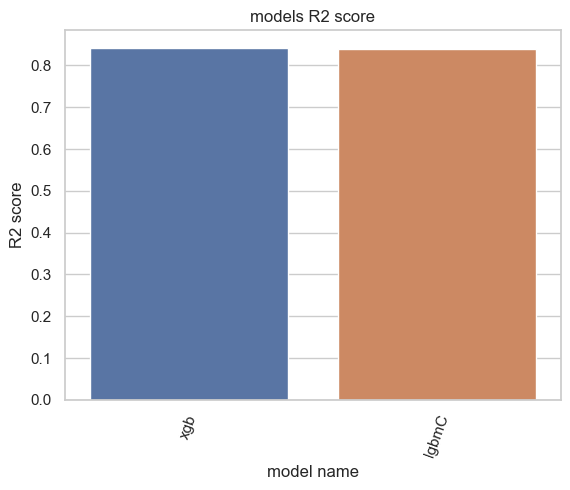

In [105]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()

In [106]:
XGBMC = XGBClassifier()
XGBMC.fit(X_train, y_train)

XGBClassifier(alpha=0.012063715109367643, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.14198953405080517, early_stopping_rounds=None,
              enable_categorical=False, eta=0.0016842485569386354,
              eval_metric=None, feature_types=None,
              gamma=1.8110005586084708e-08, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=1.1369029459700144e-06, learning_rate=0.07244128492444549,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=931, n_jobs=None, ...)

In [107]:
# Make predictions on the test data
# y_pred = lgbmC.predict(X_test)
y_pred = XGBMC.predict(X_test)

In [108]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8345952242283052


<a id="8"></a>
# <b>5 <span style='color:#94D4F6'>|</span> Evaluation</b>

In [109]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[991,   5,  97],
       [ 20,  18,  20],
       [136,   6, 424]], dtype=int64)

In [110]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()

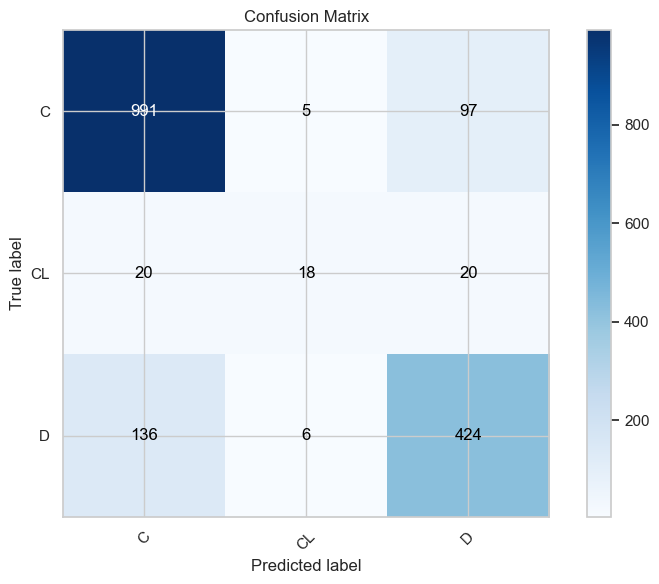

In [111]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['C','CL','D'])
plt.show()

<a id="9"></a>
# <b>6 <span style='color:#94D4F6'>|</span> Prediction</b>

### Hyperparameter tuning for XGBoost

In [123]:
# Create an Optuna objective function
def objective(trial):
    params = {
        "objective": "multi_logloss",
        "n_estimators": trial.suggest_int('n_estimators', 500, 750),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0), 
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0), 
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    # Build the xgboost model
    optuna_xgbmodel = XGBClassifier(**params,
                                    random_state=RANDOM_SEED)
    
    optuna_xgbmodel.fit(X_train, y_train)
    y_pred_probs = optuna_xgbmodel.predict_proba(X_test)
    logloss = log_loss(y_test, y_pred_probs)
    return logloss

# Create the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-12-31 05:18:21,217] A new study created in memory with name: no-name-97f8c806-e4ea-40d6-8f1f-1049d3d1e431
[I 2023-12-31 05:18:23,753] Trial 0 finished with value: 0.6261754427881249 and parameters: {'n_estimators': 527, 'learning_rate': 0.0035034519721962682, 'max_depth': 1, 'subsample': 0.1331879686352876, 'colsample_bytree': 0.7202043041970191, 'min_child_weight': 7}. Best is trial 0 with value: 0.6261754427881249.
[I 2023-12-31 05:18:31,721] Trial 1 finished with value: 0.4524987289083902 and parameters: {'n_estimators': 733, 'learning_rate': 0.007260869751166773, 'max_depth': 5, 'subsample': 0.46505719304952814, 'colsample_bytree': 0.28148071901605537, 'min_child_weight': 2}. Best is trial 1 with value: 0.4524987289083902.
[I 2023-12-31 05:18:51,870] Trial 2 finished with value: 0.432268343678551 and parameters: {'n_estimators': 738, 'learning_rate': 0.01991405835152345, 'max_depth': 6, 'subsample': 0.8994380876571502, 'colsample_bytree': 0.9041409494169514, 'min_child_weig

In [124]:
print('Best hyperparameters:', study.best_params)
print('Best Log Loss:', study.best_value)

Best hyperparameters: {'n_estimators': 567, 'learning_rate': 0.03820381248841593, 'max_depth': 9, 'subsample': 0.5717706003972762, 'colsample_bytree': 0.1386492762520236, 'min_child_weight': 6}
Best Log Loss: 0.4214686743131162


In [131]:
Best_hyperparameters = {'n_estimators': 567, 'learning_rate': 0.03820381248841593, 'max_depth': 9, 'subsample': 0.5717706003972762, 'colsample_bytree': 0.1386492762520236, 'min_child_weight': 6}

In [136]:
# Create the model
XGBMC_2 = XGBClassifier(**Best_hyperparameters, random_state=RANDOM_SEED)

In [137]:
XGBMC_2.fit(train_final, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1386492762520236, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03820381248841593,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=567, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Here, I utilized the complete dataset to train my final model.

In [139]:
id = testCopy['id']
predict = XGBMC_2.predict_proba(test[FEATS])

In [140]:
predict

array([[0.43849072, 0.05581278, 0.50569654],
       [0.33891028, 0.11667658, 0.5444131 ],
       [0.00505784, 0.00129658, 0.99364555],
       ...,
       [0.9753608 , 0.00693905, 0.0177002 ],
       [0.9769701 , 0.00493563, 0.01809424],
       [0.57384676, 0.04013439, 0.38601884]], dtype=float32)

In [141]:
sample_submissiion.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128


In [142]:
sb_file = pd.read_csv('Data/sample_submission.csv')
sb_file.Status_C = predict[:, 0]
sb_file.Status_CL = predict[:, 1]
sb_file.Status_D = predict[:, 2]
sb_file.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.438491,0.055813,0.505697
1,7906,0.338910,0.116677,0.544413
2,7907,0.005058,0.001297,0.993646
3,7908,0.987777,0.004115,0.008109
4,7909,0.846594,0.102600,0.050806


In [143]:
# write to a file
sb_file.to_csv('./submission.csv', index=False)

<center>
<span style="font-family:Comic Sans MS; color:red"><h2>Thank You😊</h2></span>
</center>